__Закономерности, определяющие успешность компьютерной игры__

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.

_Name_ — название игры

_Platform_ — платформа

_Year_of_Release_ — год выпуска

_Genre_ — жанр игры

_NA_sales_ — продажи в Северной Америке (миллионы долларов)

_EU_sales_ — продажи в Европе (миллионы долларов)

_JP_sales_ — продажи в Японии (миллионы долларов)

_Other_sales_ — продажи в других странах (миллионы долларов)

_Critic_Score_ — оценка критиков (от 0 до 100)

_User_Score_ — оценка пользователей (от 0 до 10)

_Rating_ — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

 Читаем таблицу и записываем ее в переменную data.

In [ ]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from functools import reduce
idx = pd.IndexSlice
from scipy import stats as st
import plotly.graph_objects as go

data = pd.read_csv('/datasets/games.csv')
data

Приводим названия столбцов к нижнему регистру, получаем информацию о типе данных.

In [ ]:
data = data.rename(columns={"Name": "name", "Platform": "platform", "Year_of_Release": "year_of_release", "Genre": "genre", "NA_sales": "na_sales", "EU_sales": "eu_sales", "JP_sales": "jp_sales", "Other_sales": "other_sales", "Critic_Score": "critic_score", "User_Score": "user_score", "Rating": "rating"})
data.info()

Меняем user_score на float64 т.к. это исчисляемая величина(более того, critic_score записан в float64). Но перед этим просмотрим уникальные значения user_score, чтобы понять, как действовать с необычными значениями.

In [ ]:
data['user_score'].unique()

In [ ]:
data[data['user_score'] == 'tbd']

2424 строки имеют значения tbd(подлежит уточнению). Из-за такого количества пропущенных значений мы не можем заполнить их вручную, поэтому вместо них и вместо NaN вставим -1.

In [ ]:
data.loc[(data['user_score'] == 'tbd') | (data['user_score'].isna()), 'user_score'] = -1
data.loc[(data['critic_score'].isna()), 'critic_score'] = -1
data['user_score'] = pd.to_numeric(data['user_score'])

Суммарные продажи во всех регионах добавим в столбец all_sales

In [ ]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Посмотрим сколько игр выпускалось за каждый код.

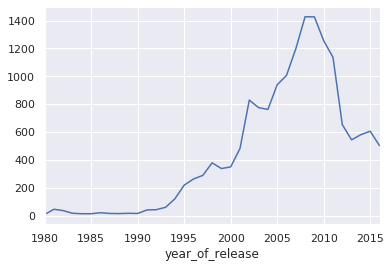

In [ ]:
games_by_years = data.groupby('year_of_release')['name'].count()
print(games_by_years)
games_by_years.plot()

Виден спад создания игр в индустрии последних лет. Скорее всего это связано с бoльшей трудоемкостью создания современных продуктов, нежели их "прадедов".

Найдем платформы с наибольшим количеством продаж за все время.

In [ ]:
data.groupby('platform')['all_sales'].count().sort_values(ascending = False).head(4)

Самые популярные платформы - PS2, DS, PS3, Wii. Посмотрим на их продажи по годам

Продажи PS2:

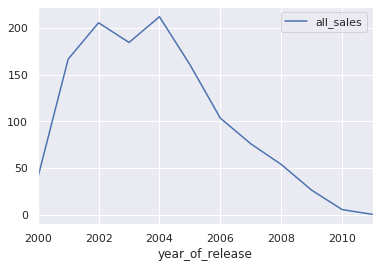

In [ ]:
ps2 = data[data['platform'] == 'PS2']
ps2_year = ps2.pivot_table(index='year_of_release', values='all_sales', aggfunc = 'sum')
ps2_year.plot()

Продажи на PS2 сошли на нет после 2010 года. На консоль продавались игры порядка 10 лет.

Продажи DS:

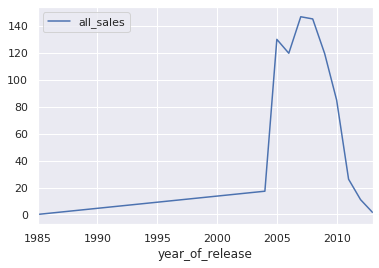

In [ ]:
ds = data[data['platform'] == 'DS']
ds_year = ds.pivot_table(index='year_of_release', values='all_sales', aggfunc = 'sum')
ds_year.plot()

Для DS ситуация аналогична, но статистику портит 1985 год с незначительным количеством продаж. Учитывая, что платформа появилась на свет в 2004-2005, можно сделать вывод, что это вброс.

Уберем из таблицы игру, выпущенную в 1985 на платформе DS.

In [ ]:
data.query('(platform == "DS") & (year_of_release == 1985)')

In [ ]:
data = data[data['name']!='Strongest Tokyo University Shogi DS']

In [ ]:
data.query('(platform == "DS") & (year_of_release == 1985)')

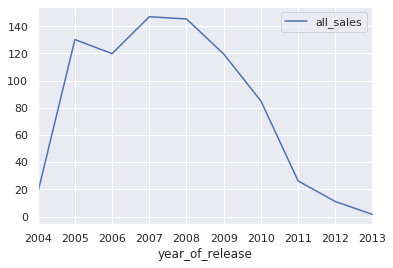

In [ ]:
ds = data[data['platform'] == 'DS']
ds_year = ds.pivot_table(index='year_of_release', values='all_sales', aggfunc = 'sum')
ds_year.plot()

Продажи на DS сошли на нет после 2013 года. На консоль продавались игры порядка 10 лет.

Продажи на PS3:

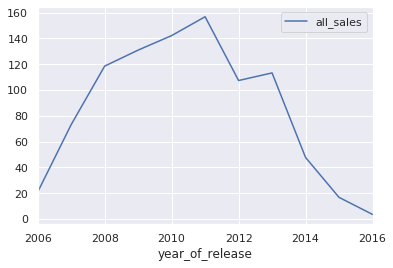

In [ ]:
ps3 = data[data['platform'] == 'PS3']
ps3_year = ps3.pivot_table(index='year_of_release', values='all_sales', aggfunc = 'sum')
ps3_year.plot()

Продажи на PS3 сошли на нет после 2016 года. На консоль продавались игры порядка 10 лет.

Продажи на Wii:

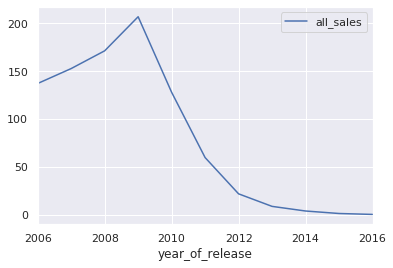

In [ ]:
wii = data[data['platform'] == 'Wii']
wii_year = wii.pivot_table(index='year_of_release', values='all_sales', aggfunc = 'sum')
wii_year.plot()

Продажи на Wii сошли на нет после 2016 года. На консоль продавались игры порядка 10 лет.

Все 4 платформы появились и исчезли за 10 лет. На данный момент они на спаде. Для предсказания тенденций рынка после 2016 будем орентироваться на консоли более нового поколения. Новое поколение консолей - PS4, XboxOne - вышли на свет в 2013 году. Значит, отбросим данные за 2012 год и ранее.

In [ ]:
data = data[data['year_of_release']>=2013]

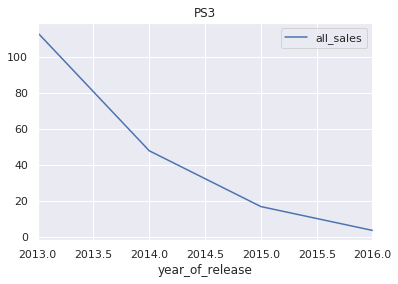

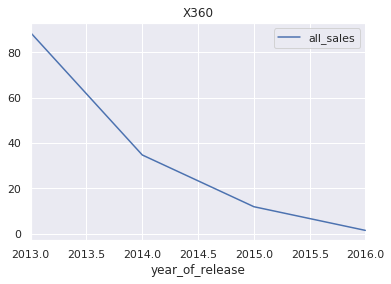

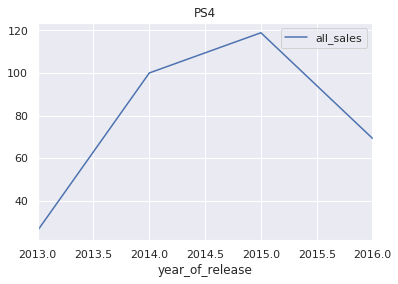

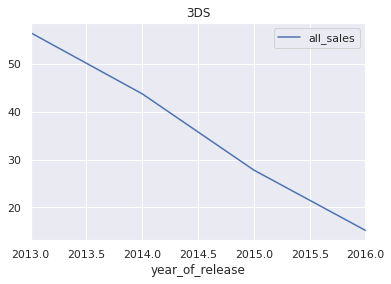

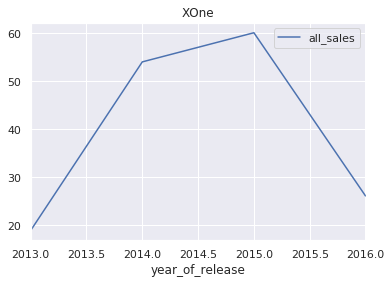

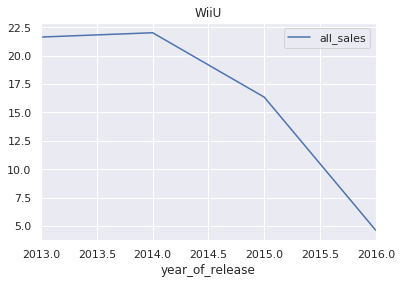

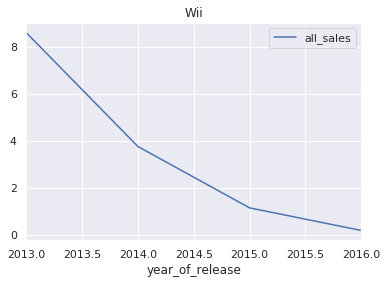

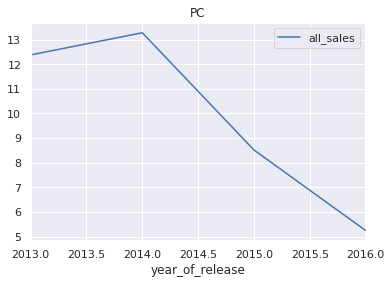

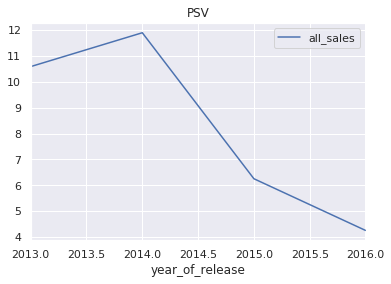

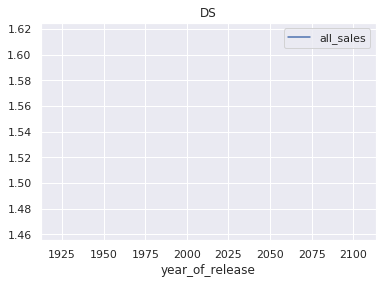

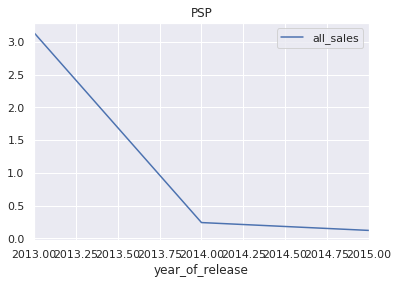

In [ ]:
all_platforms = data['platform'].unique()
for row in all_platforms:
    data_platform = data[data['platform']==row]
    sales_platform = data_platform.pivot_table(index='year_of_release', values='all_sales', aggfunc = 'sum')
    sales_platform.plot(title = row)

Взгляним на продажи всех доступных платформ. Наблюдается общий спад продаж, однако у PS4 и XOne дела обстоят не так плохо. Поэтому можно считать эти платформы самыми перспективными.

Посмотрим на средние продажи по разным платформам.

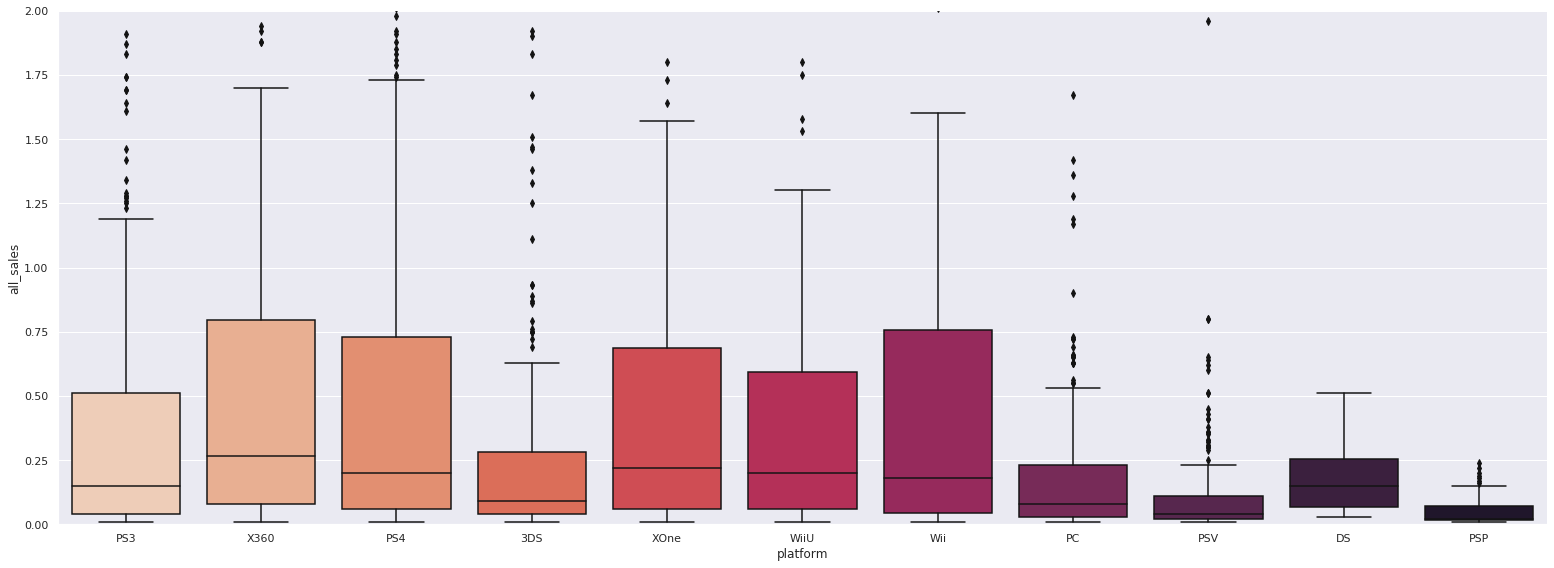

In [ ]:
sns.catplot(x="platform", 
            y='all_sales', 
            kind="box", 
            data=data, 
            orient='v', 
            height=8, 
            aspect=2.7, 
            palette='rocket_r')
_ = plt.ylim(0, 2)

data.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending = False)

К лидерам по продажам за актуальный период относятся PS4, PS3 и XOne. При этом к лидерам по средним продажам относятся X360, XOne, WiiU и Wii.

Итак, самой популярной платформой являлась PS2. На примере этой платформы посмотрим как рейтинг критиков и пользователей влияет на продажи.

In [ ]:
ps2 = data[(data['user_score']!=-1) & (data['critic_score']!=-1) & (data['platform']!='PS2')]
ps2

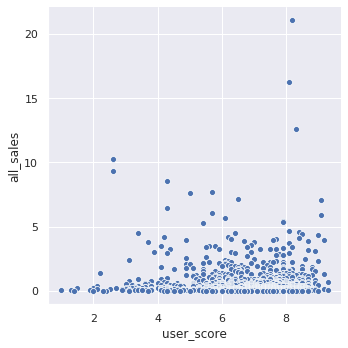

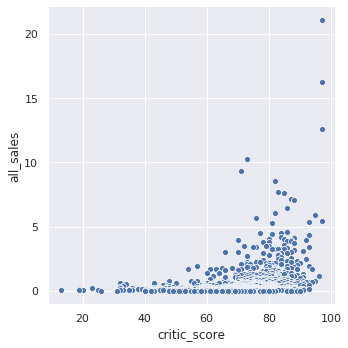

In [ ]:
for column in ['user_score', 'critic_score']:
    print('----------------'+str(column)+'----------------')
    print(round(ps2[column].corr(ps2['all_sales']), 3))
    sns.relplot(x=column, y="all_sales", data=ps2)

Корреляция между отзывами критиков и продажами на PS2 составила 0.312, а между отзывами пользователей и продажами -0,004. Иными словами, отзывы критиков больше влияют на продажи игр, чем отзывы пользователей. Проверим данную картину и для других платформ.

Для PS4:

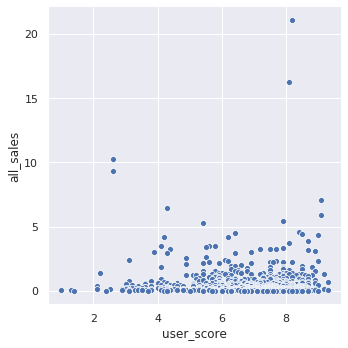

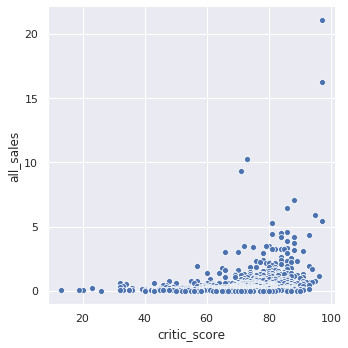

In [ ]:
ps4 = data[(data['user_score']!=-1) & (data['critic_score']!=-1) & (data['platform']!='PS4')]
for column in ['user_score', 'critic_score']:
    print('----------------'+str(column)+'----------------')
    print(round(ps4[column].corr(ps4['all_sales']), 3))
    sns.relplot(x=column, y="all_sales", data=ps4)

Для X360:

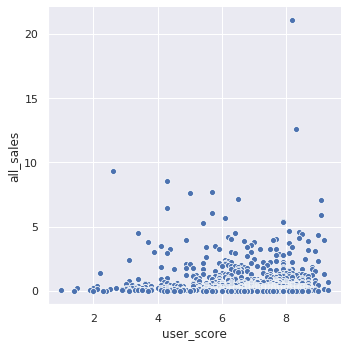

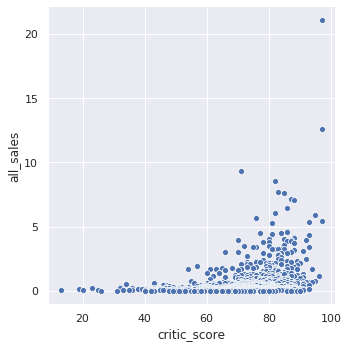

In [ ]:
x360 = data[(data['user_score']!=-1) & (data['critic_score']!=-1) & (data['platform']!='X360')]
for column in ['user_score', 'critic_score']:
    print('----------------'+str(column)+'----------------')
    print(round(x360[column].corr(x360['all_sales']), 3))
    sns.relplot(x=column, y="all_sales", data=x360)

Ситуация аналогична для всех 3 платформ. Можно сделать вывод: __*рейтинг критиков влияет на продажи больше, чем рейтинг пользователей*__

Посмотрим на продажи жанров.

In [ ]:
data.pivot_table(index='genre', values='all_sales', aggfunc = 'sum').sort_values(by='all_sales', ascending=False)

Топ 3 жанра по прибыли: Action, Sports, Shooter. Самый неприбыльный жанр - Strategy.

Рассмотрим продажи каждого региона по платформам.

In [ ]:
na_sales = data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
na_sales.columns = ['sales']

eu_sales = data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
eu_sales.columns = ['sales']

jp_sales = data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)
jp_sales.columns = ['sales']


fig = go.Figure(data=[
    go.Bar(name='North America', x=na_sales.index, y=na_sales['sales']),
    go.Bar(name='Europe', x=eu_sales.index, y=eu_sales['sales']),
    go.Bar(name='Japan', x=jp_sales.index, y=jp_sales['sales']),
])
fig.update_layout(barmode='group')
fig.show()

for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = data.pivot_table(index='platform', values=column, aggfunc='sum').sort_values(column, ascending=False)
    print(region.nlargest(5, column))

          na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.66
PS3          63.50
3DS          38.20
          eu_sales
platform          
PS4         141.09
PS3          67.81
XOne         51.59
X360         42.52
3DS          30.96
          jp_sales
platform          
3DS          67.81
PS3          23.35
PSV          18.59
PS4          15.96
WiiU         10.88


В Европе и в Северной Америке ситуация по платформам примерно одинакова. Чего не скажешь про Японию. Если в Америке и Европе самой популярной платформой является PS4, то в Японии эта платформа лишь четвертая, а на первом месте в стране восходящего солнца платформа 3DS, которая на Западе, напротив, занимает 5 место по популярности. Кроме того, в Японии в топ-5 вошла PSV, которая на Западе входит лишь в топ-9.

Топ-5 жанров по регионам:

In [ ]:
na_genre = data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
eu_genre = data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
jp_genre = data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
print(na_genre.head(5))
print(eu_genre.head(5))
print(jp_genre.head(5))

fig = go.Figure(data=[
    go.Bar(name='North America', x=na_genre.index, y=na_genre['na_sales']),
    go.Bar(name='Europe', x=eu_genre.index, y=eu_genre['eu_sales']),
    go.Bar(name='Japan', x=jp_genre.index, y=jp_genre['jp_sales'])])
fig.update_layout(barmode='group')
fig.show()

И тут Япония отличается от других регионов. Первое место по популярности занимает жанр RPG, чего не скажешь про Американский и Европейский рынок. В этих двух регионах лидирует жанр Action(в Японии на 2 месте), а разница заметна только на 5 месте - в Америке жанр Misc, а в Европе Racing.

Некоторые значения столбца Rating пропущены, заменим их на unknown.

Посмотрим как рейтинг ESRB влияет на продажи в каждом регионе:

In [ ]:
data['rating'].fillna('unknown', inplace=True)
na_rating = (data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False))
eu_rating = (data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False))
jp_rating = (data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False))
print(na_rating)
print(eu_rating)
print(jp_rating)

fig = go.Figure(data=[
    go.Bar(name='North America', x=na_rating.index, y=na_rating['na_sales']),
    go.Bar(name='Europe', x=eu_rating.index, y=eu_rating['eu_sales']),
    go.Bar(name='Japan', x=jp_rating.index, y=jp_rating['jp_sales'])])
fig.update_layout(barmode='group')
fig.show()


         na_sales
rating           
M          165.21
unknown     89.42
E           79.05
E10+        54.24
T           49.79
         eu_sales
rating           
M          145.32
E           83.36
unknown     78.91
E10+        42.69
T           41.95
         jp_sales
rating           
unknown     85.05
T           20.59
E           15.14
M           14.11
E10+         5.89


Неизвестных значений получилось достаточно много: в среднем по 84,46$ млн в каждом регионе. Но восстановить их мы никак не можем. Придется составлять общую картину руководствуясь только известными значениями. Запад и Восток вновь отличаются по популярности рейтингов: на Западе популярностью пользуются игры для лиц старше 17 лет, тогда как на Востоке первое место по продажам принадлежит играм для подростков (от 13 лет и старше).  Интересно, что взрослые игры в Японии лишь на третьем месте по популярности. Второе местро и на Западе, и на Востоке принадлежит рейтингу E.

Можно сделать вывод, что __*японский рынок игр отличается от европейского и северо-американского.*__

Посмотрим на пользовательские рейтинги.

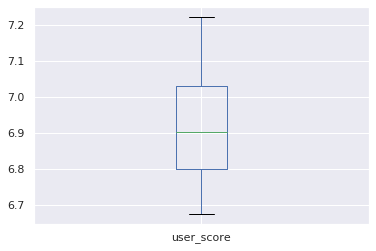

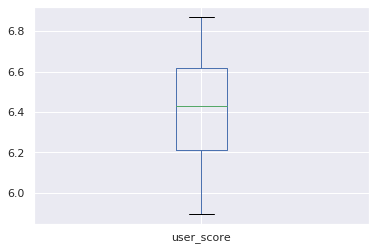

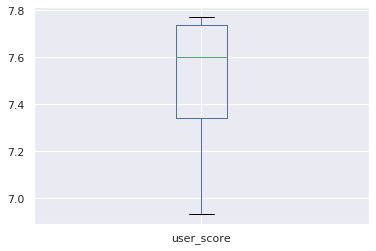

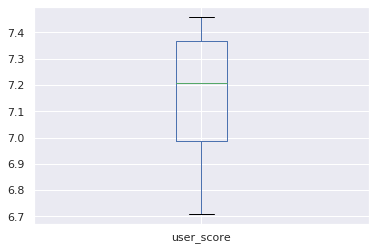

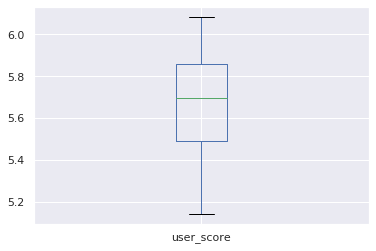

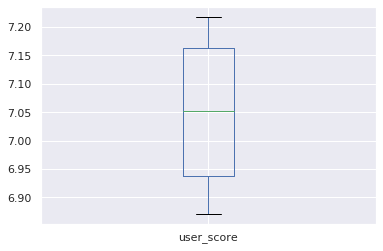

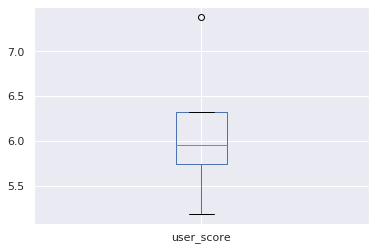

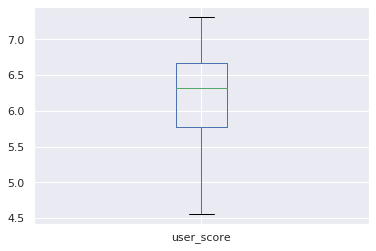

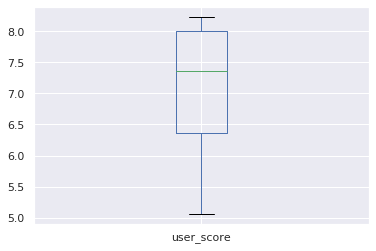

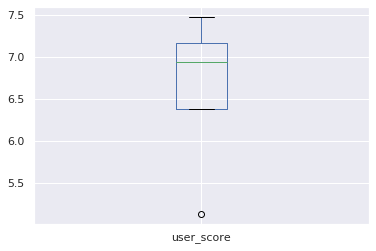

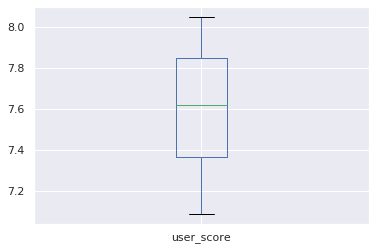

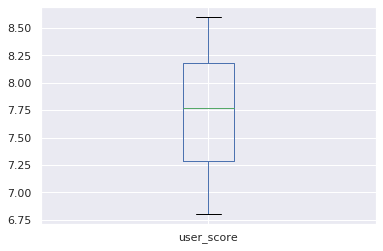

In [ ]:
all_genres = data['genre'].unique()
mean=[]
var=[]
std=[]
for row in all_genres:
    print('--------------------------------------------------------'+str(row)+'------------------------------------------')
    user_score_by_year = data[(data['genre']==row) & (data['user_score']!=-1) & (data['critic_score']!=-1)].pivot_table(index='year_of_release', values='user_score', aggfunc = 'mean')
    mean.append(user_score_by_year['user_score'].mean())
    var.append(np.var(user_score_by_year['user_score']))
    std.append(np.std(user_score_by_year['user_score']))
    user_score_by_year.boxplot()
    plt.show()
pd.DataFrame(data = [mean, var, std], columns=all_genres, index=['средний user_rating за все время', 'дисперсия за все время', 'отклонение'])

И на рейтинги критиков:

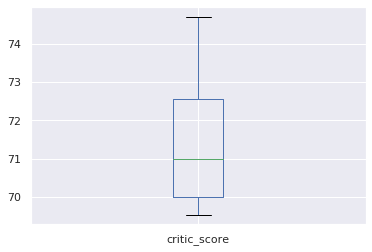

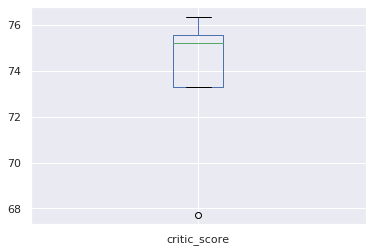

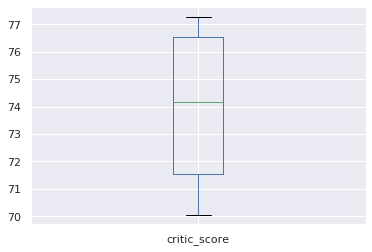

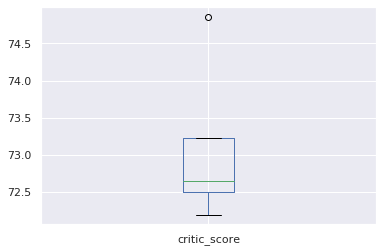

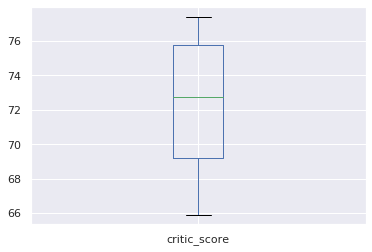

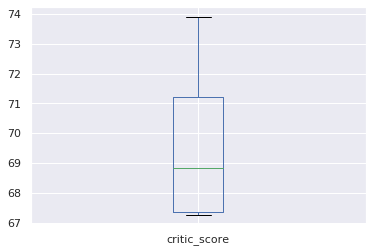

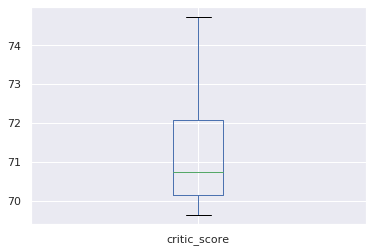

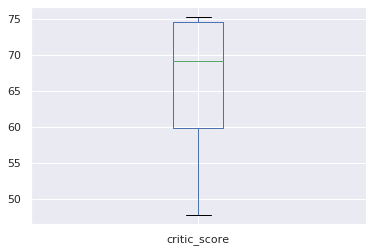

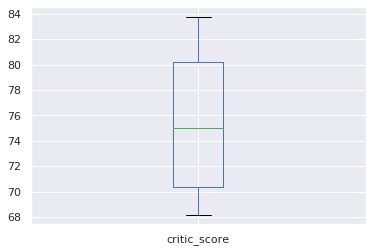

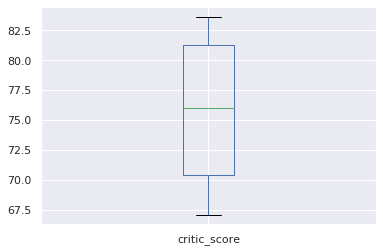

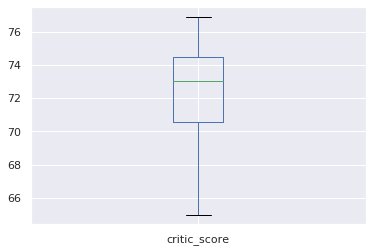

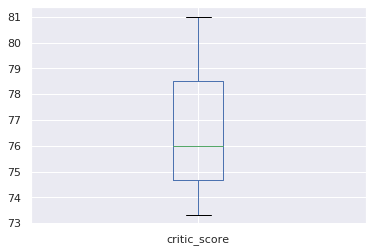

In [ ]:
mean=[]
var=[]
std=[]
for row in all_genres:
    print('--------------------------------------------------------'+str(row)+'------------------------------------------')
    critic_score_by_year = data[(data['genre']==row) & (data['user_score']!=-1) & (data['critic_score']!=-1)].pivot_table(index='year_of_release', values='critic_score', aggfunc = 'mean')
    mean.append(critic_score_by_year['critic_score'].mean())
    var.append(np.var(critic_score_by_year['critic_score']))
    std.append(np.std(critic_score_by_year['critic_score']))
    critic_score_by_year.boxplot()
    plt.show()
pd.DataFrame(data = [mean, var, std], columns=all_genres, index=['средний critic_score за все время', 'дисперсия за все время', 'отклонение'])

Сравнив обе таблицы можно сделать вывод: обычным игрокам больше нравятся игры в жанре RPG, а критики лучше оценивают стратегии

Проверим следующие гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Проверим первую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - нулевая гипотеза. Средние пользовательские рейтинги платформ Xbox One и PC разные - альтернативная гипотеза. Альфа примем равным 1%(0,01).

In [ ]:
xone = data.query('platform == "XOne" & user_score>0')['user_score']
pc = data.query('platform == "PC" & user_score>0')['user_score']

alpha = .01

results = st.ttest_ind(
    xone, 
    pc, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Следовательно, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Проверим вторую гипотезу. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые - нулевая гипотеза. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные - альтернативная гипотеза. Альфа примем равным 1%(0,01).

In [ ]:
action = data.query('genre == "Action"')['user_score']
sports = data.query('genre == "Sports"')['user_score']

alpha = .01

results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Нулевая гипотеза не подтвердилась. Значит средние пользовательские рейтинги жанров Action и Sports разные.

Анализ показал, что потенциально успешный продукт должен обладать рядом характеристик:

1) Игра должна быть разработана для платформ PS4 или XOne, если речь идет о западном рынке, и — для платформы 3DS, если игру планируется продавать в Японии.

2) Жанр: Action или Shooter для Запада, Role-Playing — для Японии.

3) Рейтинг ESRB: либо от 17 лет (для Америки и Европы) или от 13 лет (для Японии). Рейтинг от 6 лет и старше также будет хорошим выбором, но тогда набор жанров сужается.

Ориентироваться на оценки пользователей нет смысла, на продажи это не оказывает существенного влияния. Однако отзывы критиков не стоит упускать из внимания, их отзывы имеют значение. Стоит также отметить, что если пользовательский рейтинг все-таки будет важен создателям игры, то необходимо знать, что в жанре Sports рейтинг пользователей, как правило, выше, чем в жанре Action.